# Part 1

In [13]:
# Import packages for dataframe manipulation and viewing all code output in-notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
# Read Fremont Bike CSV file into Pandas DF
bike_data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')

In [15]:
# Inspect data
bike_data.head()
n = bike_data.shape[0]

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


# Part 2

In [16]:
# Break up the datetime string into date, time, and AM/PM, then break up date and time further
date_split1 = bike_data['Date'].str.split(" ", expand = True)
date_split2 = date_split1[0].str.split("/", expand = True)
time_split = date_split1[1].str.split(":", expand = True)

In [ ]:
# Pull year out of the date string, pull hour of day out of the time string, and keep AM/PM
bike_data['Year'] = date_split2[2]
bike_data['Hour'] = time_split[0]
bike_data['AM/PM'] = date_split1[2]

In [21]:
# Cast hour to an integer
bike_data['Hour'] = bike_data['Hour'].astype(int)

In [22]:
# Map hour of day to a 24-hour cycle - 12:00:00 AM is hour 0 and we count up until hour 23 at 11:00:00 PM. 
for i in range(n):
    if (bike_data.loc[i, 'Hour'] == 12):
        bike_data.loc[i, 'Hour'] = 0
    if (bike_data.loc[i, 'AM/PM'] == 'PM'):
        bike_data.loc[i, 'Hour'] += 12

In [23]:
# Sanity check. Note that total bicycle count is already present.
bike_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Year,Hour,AM/PM
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,2012,0,AM
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,2012,1,AM
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2012,2,AM
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,2012,3,AM
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,2012,4,AM


# Part 3

In [25]:
# Create dataframe for bike data where the year is 2016
bike_data_2016 = bike_data.copy()
bike_data_2016 = bike_data_2016[bike_data_2016['Year'] == '2016']

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Year,Hour,AM/PM
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,2016,0,AM
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,2016,1,AM
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,2016,2,AM
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,2016,3,AM
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,2016,4,AM


In [26]:
# Sanity check again
bike_data.head()
bike_data_2016.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Year,Hour,AM/PM
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,2012,0,AM
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,2012,1,AM
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2012,2,AM
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,2012,3,AM
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,2012,4,AM


,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Year,Hour,AM/PM
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,2016,0,AM
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,2016,1,AM
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,2016,2,AM
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,2016,3,AM
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,2016,4,AM


# Part 4

In [33]:
# Group by hour and apply sum() to get hourly counts for bicycle traffic
bike_counts_by_hour = bike_data.groupby('Hour').sum()

In [34]:
# Sanity check
bike_counts_by_hour

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Hour,,,
0,31486.0,13357.0,18129.0
1,16683.0,7472.0,9211.0
2,10908.0,5233.0,5675.0
3,8064.0,4149.0,3915.0
4,17989.0,9537.0,8452.0
5,70627.0,43361.0,27266.0
6,249553.0,150561.0,98992.0
7,632384.0,393558.0,238826.0
8,899880.0,531514.0,368366.0


Text(0, 0.5, 'Total count of bicycles')

Text(0.5, 1.0, 'Hourly bicycle count across Fremont Bridge since 2012')

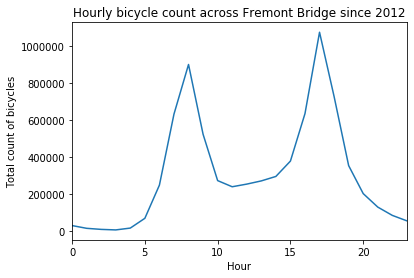

In [41]:
# Now plot the bicycle counts against the hour of day
bike_counts_by_hour['Fremont Bridge Total'].plot()
plt.ylabel('Total count of bicycles')
plt.title('Hourly bicycle count across Fremont Bridge since 2012')
plt.show()

# Part 5

In [38]:
# Calculate average bike traffic per hour in the group by calculation now 
# This should basically be the same as the counts divided by a constant
bike_counts_avgs = bike_data.groupby('Hour').mean()

In [40]:
# Calculate and output argmax hour of day
max_avg = bike_counts_avgs['Fremont Bridge Total'].max()
for i in range(24):
    if bike_counts_avgs.loc[i, "Fremont Bridge Total"] == max_avg:
        max_hour = i
        break

max_hour

17

Due to how I represented hour of day in the "Hour" column by Military time, hour 17 is 5:00 PM. That lines up nicely with evening rush hour traffic when folks are all commuting home from work. 